### Author: Allan R. Jeeboo 
### Preferred Name: Vyncent S. A. van der Wolvenhuizen 
### Affiliation: Data Science student at TripleTen 
### Email: vanderwolvenhuizen.vyncent@proton.me
### Date Started: 2025-07-02 
### Last Updated: 2025-08-15 10:34 
--- 
--- 

# 1.0 Introduction 

In this project, we'll be placed in this scenario: 
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, we can quickly find out the market value of our car. We have access to historical data: technical specifications, trim versions, and prices. We need to build the model to determine the value. 

Rusty Bargain is interested in:

- The quality of the prediction
- The speed of the prediction
- The time required for training 

We'll train different models with various hyperparameters, then implement and compare gradient boosting methods with random forest, decision tree, and linear regression. We'll also use the RMSE metric to evaluate the models.

**Project Workflow:** 

1.0 Introduction 
- 1.1 Data Import & Overview 
- 1.2 Data Description 
- 1.3 Chapter 1 Summary 

2.0 Data Preprocessing 
- 2.1 Column Adjustments 
- 2.2 NaNs 
- 2.3 Duplicates 
- 2.4 Chapter 2 Summary 

3.0 EDA (Exploratory Data Analysis) 
- 3.1 Price 
- 3.2 Vehicle Type 
- 3.3 Registration Year 
- 3.4 Gearbox 
- 3.5 Power 
- 3.6 Model 
- 3.7 Kilometers 
- 3.8 Registration Month 
- 3.9 Fuel Type 
- 3.10 Brand 
- 3.11 Not Repaired 
- 3.12 Chapter 3 Summary 

4.0 Modeling 
- 4.1 Ordinal Encoding & Data Splitting 
    - 4.1.1 Ordinal Encoding 
    - 4.1.2 Data Splitting 
- 4.2 Linear Regression 
- 4.3 Decision Tree Regression 
- 4.4 Random Forest Regressor 
- 4.5 Cat Boost Regressor 
- 4.6 LGBM Regressor 
- 4.7 XGB Regressor 
- 4.8 Chapter 4 Summary 

5.0 Conclusion

--- 
--- 

### 1.1 Data Import & Overview 
Let's begin by importing the necessary modules and loading the dataset. We'll then examine the first few rows and review the dataset's structure to gain an initial understanding of the data we'll be working with. 

In [57]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import time 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split 
from sklearn.preprocessing import OrdinalEncoder, StandardScaler 
from sklearn.tree import DecisionTreeRegressor 

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

df = pd.read_csv('/datasets/car_data.csv') 

In [58]:
display(df.head()) 
print(df.shape)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


(354369, 16)


In [59]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [60]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

---

### 1.2 Data Description 

Features:
- DateCrawled — date profile was downloaded from the database
- VehicleType — vehicle body type
- RegistrationYear — vehicle registration year
- Gearbox — gearbox type
- Power — power (hp)
- Model — vehicle model
- Mileage — mileage (measured in km due to dataset's regional specifics)
- RegistrationMonth — vehicle registration month
- FuelType — fuel type
- Brand — vehicle brand
- NotRepaired — vehicle repaired or not
- DateCreated — date of profile creation
- NumberOfPictures — number of vehicle pictures
- PostalCode — postal code of profile owner (user)
- LastSeen — date of the last activity of the user

Target:
- Price — price (Euro)

---

### 1.3 Chapter 1 Summary 

In this chapter, we imported the dataset and essential libraries, explored the data’s structure, and clarified the meaning of each column. Several issues became apparent: the column names use capital letters, which is inconsistent with Python’s [PEP 8](https://peps.python.org/pep-0008/) style guide; there are missing values (NaNs) in the data; and three date-related columns—`DateCrawled`, `DateCreated`, and `LastSeen`—along with `NumberOfPictures` and `PostalCode`, don't contribute meaningfully to our analysis. 

# 2.0 Data Preprocessing 
---

### 2.1 Column Adjustments 

In this section, we'll clean and standardize the dataset's columns to prepare for analysis and modeling. Specifically, we'll remove irrelevant or redundant columns, convert all column names to lowercase to ensure consistency, and rename certain columns to follow Python's PEP 8 style guidelines. These adjustments will help streamline subsequent data processing steps and improve code readability. 

*Note:*  
The column originally named `mileage` will be renamed to `kilometers` to accurately reflect its units and avoid confusion. The `not_repaired` column name may also seem ambiguous, but due to a lack of further clarification in the dataset documentation, it'll remain unchanged.


In [61]:
df.drop(columns=['DateCrawled', 
                 'DateCreated', 
                 'NumberOfPictures', 
                 'PostalCode', 
                 'LastSeen'], 
                 axis=1, 
                 inplace=True) 

df.columns = df.columns.str.lower() 

df.rename(columns={'vehicletype': 'vehicle_type', 
                   'registrationyear': 'registration_year', 
                   'mileage': 'kilometers', 
                   'registrationmonth': 'registration_month', 
                   'fueltype': 'fuel_type', 
                   'notrepaired': 'not_repaired'}, 
                   inplace=True) 

df.head() 

,price,vehicle_type,registration_year,gearbox,power,model,kilometers,registration_month,fuel_type,brand,not_repaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


---

### 2.2 NaNs 
In this subsection, we'll address missing values (NaNs) in the dataset. We'll begin by identifying which columns contain NaNs and examining the nature of these columns. We'll then consider appropriate imputation strategies to preserve the integrity of the data. This process will ensure our dataset is complete and ready for subsequent analysis and modeling. 

In [62]:
df.isna().sum() 

price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometers                0
registration_month        0
fuel_type             32895
brand                     0
not_repaired          71154
dtype: int64

There are several columns with missing values: `vehicle_type`, `gearbox`, `model`, `fuel_type`, and `not_repaired`. Since these are all categorical features and we don't know the values, it would be appropriate to fill the missing values with 'unknown'. This approach will prevent a risk of bias.

In [63]:
df = df.fillna('unknown')

In [64]:
df.isna().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometers            0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
dtype: int64

Now that we've handled the missing values, the next step is to check for and remove any duplicate rows in the dataset.

---

### 2.3 Duplicates 

In this section, we'll identify and remove any duplicate rows from the dataset to ensure data quality and prevent bias in our analysis. 

In [65]:
df.duplicated().sum()

27543

In [66]:
df.drop_duplicates(inplace=True) 
display(df.head()) 
print(f'Number of duplicates: {df.duplicated().sum()}')
print(f'Shape: {df.shape}')

,price,vehicle_type,registration_year,gearbox,power,model,kilometers,registration_month,fuel_type,brand,not_repaired
0,480,unknown,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown
1,18300,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


Number of duplicates: 0
Shape: (326826, 11)


---

### 2.4 Chapter 2 Summary 
In this chapter, we performed essential data preprocessing steps to prepare the dataset for modeling. We removed irrelevant columns, standardized column names to follow PEP 8 guidelines, and addressed missing values in categorical features by filling them with the mode. Duplicate rows were identified and dropped to ensure data quality. These steps resulted in a clean and consistent dataset, ready for further analysis and model development.

---
---

# 3.0 EDA 
In this chapter, we'll conduct an exploratory data analysis (EDA) of the used car dataset. We'll systematically examine each feature, visualizing distributions and identifying potential anomalies or patterns. The analysis will include summary statistics, histograms, and bar plots for both numerical and categorical variables. We'll also investigate the relationships between features and the target variable–price. This process will help us understand the structure of the data, detect outliers, and inform our approach to data preprocessing and modeling in subsequent chapters. 

**Workflow Overview:**

Below is a workflow summary for this chapter with a reminder of what each column represents.:

**Reminder: Column Descriptions**

- 3.1 `price`: Target variable, car price in Euros.
- 3.2 `vehicle_type`: Body type of the vehicle (e.g., sedan, SUV).
- 3.3 `registration_year`: Year the vehicle was registered.
- 3.4 `gearbox`: Type of gearbox (manual or automatic).
- 3.5 `power`: Engine power in horsepower (hp).
- 3.6 `model`: Vehicle model.
- 3.7 `kilometers`: Kilometers displayed on the odometer.
- 3.8 `registration_month`: Month the vehicle was registered.
- 3.9 `fuel_type`: Type of fuel used (e.g., petrol, diesel).
- 3.10 `brand`: Vehicle brand (encoded).
- 3.11 `not_repaired`: Whether the vehicle has been repaired (yes/no, encoded).
- 3.12 Chapter summary

---

### 3.1 Price 

In [67]:
df.price.describe() 

count    326826.000000
mean       4403.747330
std        4518.209808
min           0.000000
25%        1000.000000
50%        2700.000000
75%        6350.000000
max       20000.000000
Name: price, dtype: float64

Immediately, I've noticed that the maximum value is €20,000—more than three times higher than the 75th percentile (€6,400) and about 7.4 times higher than the median (€2,700). This suggests that price is heavily right-skewed. I suspect there's a dense cluster of values at the lower end, with some significant gaps and outliers at the higher end. To confirm this, let's create a histogram and look for potential outliers.

In [68]:
df.isna().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometers            0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
dtype: int64

In [69]:
df = df[df['price']>500]

In [70]:
df.price.describe() 

count    288028.000000
mean       4964.713115
std        4528.635643
min         501.000000
25%        1500.000000
50%        3300.000000
75%        6999.000000
max       20000.000000
Name: price, dtype: float64

In [71]:
df.isna().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometers            0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
dtype: int64

In [1]:
sns.histplot(df.price, 
             bins=50, 
             kde=True, 
             color='blue', 
             edgecolor='black') 

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

NameError: name 'sns' is not defined

- I've noticed that the maximum value is €20,000—more than three times higher than the 75th percentile (€6,400) and about 7.4 times higher than the median (€2,700). This suggests that price is heavily right-skewed. 
- The minimum value in the set is €0.00, which shouldn't be there due to what the data pertains to. We'll filter those out. Despite there being listings as low as €100, I cannot say with great certainty that those are inded untrue values; therefore, I shall leave them in the data.
- I suspect there's a dense cluster of values at the lower end, with some significant gaps and outliers at the higher end To confirm this, let's create a histogram and look for potential outliers.

---

### 3.2 Vehicle Type

In [73]:
df.vehicle_type.value_counts()

sedan          76780
small          60767
wagon          54574
bus            25741
unknown        25101
convertible    18029
coupe          13707
suv            10697
other           2632
Name: vehicle_type, dtype: int64

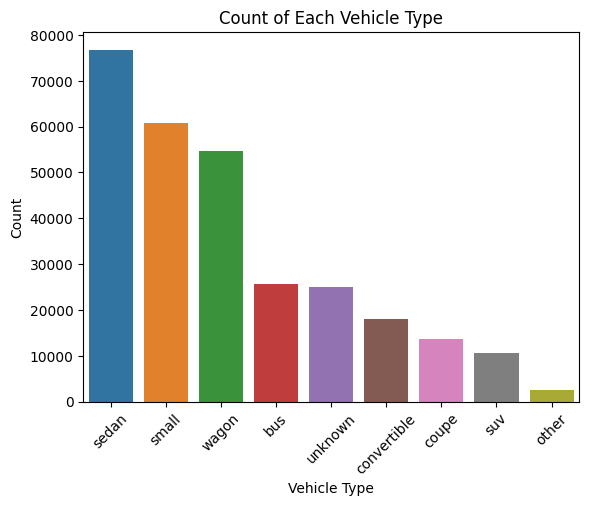

In [74]:
vehicle_counts = df['vehicle_type'].value_counts()
sns.barplot(x=vehicle_counts.index, 
            y=vehicle_counts.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.title('Count of Each Vehicle Type')
plt.xticks(rotation=45)
plt.show()

The data revealed that sedans are the most common vehicle type, followed by small cars and wagons. Less common types include buses, convertibles, coupes, SUVs, and vehicles categorized as "other." 

---

### 3.3 Registration Year

In [75]:
df.registration_year.describe()

count    288028.000000
mean       2004.225891
std          66.213108
min        1000.000000
25%        2000.000000
50%        2004.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

In [76]:
df.registration_year.value_counts()

2005    19270
2006    17850
2000    17719
2003    17518
2004    17458
        ...  
1949        1
5300        1
8888        1
7100        1
2290        1
Name: registration_year, Length: 127, dtype: int64

Wow, I didn't know that they had cars in the year 1000! (*I'm joking*) We even have cars in stock from nearly 8000 years in the future! As we can see, there are some values that are very much out of place, so let's address this by constricting the range to be within 1900 and 2025 (inclusive).

In [77]:
df.shape

(288028, 11)

In [78]:
df = df[(df['registration_year'] >= 1900) & (df['registration_year'] <= 2025)]
df.isna().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometers            0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
dtype: int64

In [79]:
df.shape

(287958, 11)

After filtering, 161 rows were removed from the dataset due to invalid registration years. Let's visualize the updated distribution with a histogram.

<AxesSubplot:xlabel='registration_year', ylabel='Count'>

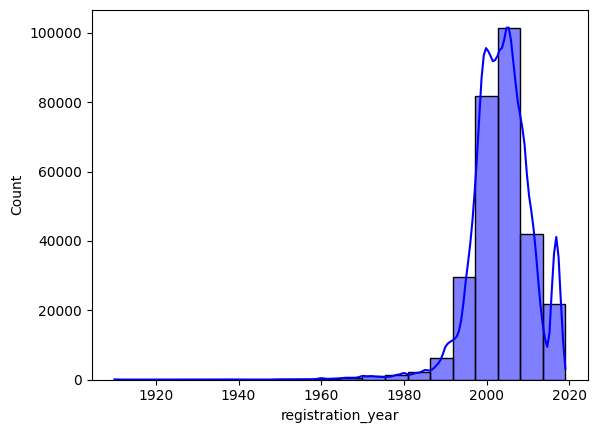

In [80]:
sns.histplot(df.registration_year, 
             bins=20, 
             kde=True, 
             color='blue', 
             edgecolor='black')

The analysis of the `registration_year` feature revealed several implausible values, including years far in the past and future. To address this, the dataset was filtered to include only vehicles registered between 1900 and 2025. This adjustment removed a small number of records with invalid years, resulting in a more realistic and reliable distribution. The majority of vehicles were registered after 1960, with very few cars from earlier years. This cleaned feature now provides a trustworthy basis for further analysis and modeling. 

---

### 3.4 Gearbox

In [81]:
df.gearbox.unique()

array(['manual', 'auto', 'unknown'], dtype=object)

In [82]:
df.gearbox.value_counts()

manual     218513
auto        57954
unknown     11491
Name: gearbox, dtype: int64

Text(0.5, 1.0, 'Count of Each Gearbox Type')

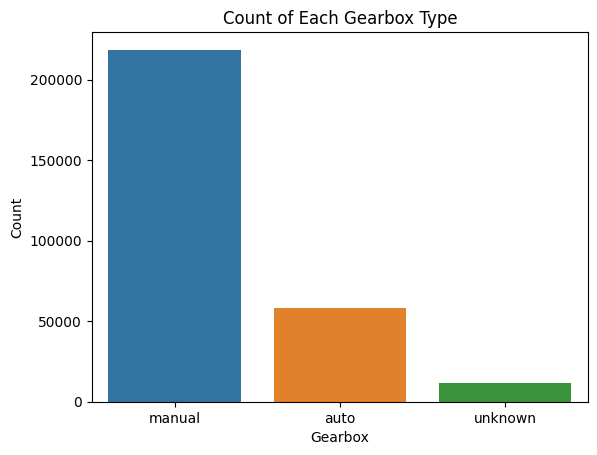

In [83]:
sns.countplot(x='gearbox', data=df)
plt.xlabel('Gearbox')
plt.ylabel('Count')
plt.title('Count of Each Gearbox Type')

As shown above, vehicles with manual transmissions are much more prevalent in the dataset than those with automatic transmissions. 

---

### 3.5 Power

In [84]:
df.power.describe() 

count    287958.000000
mean        115.752658
std         194.969074
min           0.000000
25%          75.000000
50%         109.000000
75%         146.000000
max       20000.000000
Name: power, dtype: float64

Cars with 20,000 horsepower don't exist. The vehicle with the highest horsepower is the [2024 Koenigsegg Gemera](https://www.caranddriver.com/news/a44506609/koenigsegg-gemera-production-v8-details/) at 2,300hp and most cars fall into the 100hp to 300hp [range](https://www.jdpower.com/cars/shopping-guides/what-is-the-average-horsepower-of-a-car). Because of this, I'll constrict the values to be between 40hp and 400hp (inclusive).

In [85]:
df = df[(df.power >= 40) & (df.power <= 400)] 
df.shape

(260697, 11)

Text(0.5, 1.0, 'Horsepower Distribution')

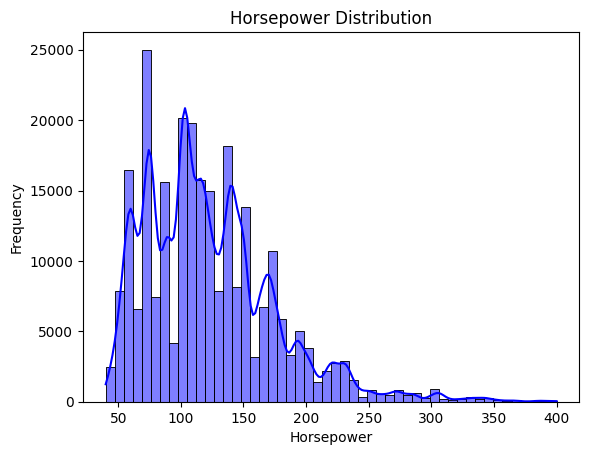

In [86]:
sns.histplot(df.power, 
             bins=50, 
             kde=True, 
             color='blue', 
             edgecolor='black') 

plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Horsepower Distribution')

The data is right-skewed, showing a concentration of values at the lower end with a gradual decline toward higher values. No clear pattern is evident in the distribution.

### 3.6 Model

In [87]:
df.model.value_counts()

golf                  21735
other                 17904
3er                   15558
unknown               10000
polo                   8469
                      ...  
rangerover                3
serie_3                   3
601                       3
samara                    3
range_rover_evoque        1
Name: model, Length: 250, dtype: int64

The Volkswagen Golf is the most common vehicle in the dataset, appearing far more frequently than any other model. Due to the large number of unique vehicle models present, a visualization (such as a bar plot) has been excluded here, as it would be difficult to interpret and visually cluttered. Instead, summary statistics and value counts are used to highlight the dominance of the Golf and to provide insight into the distribution of vehicle models within the data.

---

### 3.7 Kilometers

In [88]:
df.kilometers.describe()

count    260697.000000
mean     127823.277598
std       36834.254785
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometers, dtype: float64

Text(0.5, 1.0, 'Kilometer Distribution')

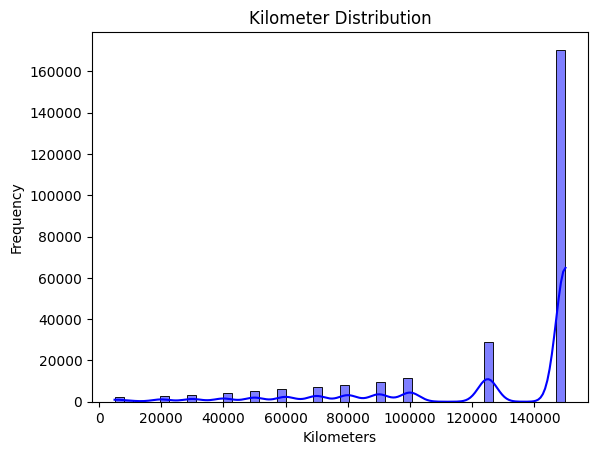

In [89]:
sns.histplot(df.kilometers, 
             bins=50, 
             kde=True, 
             color='blue', 
             edgecolor='black') 

plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.title('Kilometer Distribution')

The distribution of the `kilometers` feature appears unusual. Could the mileage data be synthetic or artificially generated? 

---

### 3.8 Registration Month

In [90]:
df.registration_month.describe()

count    260697.000000
mean          6.032889
std           3.567404
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registration_month, dtype: float64

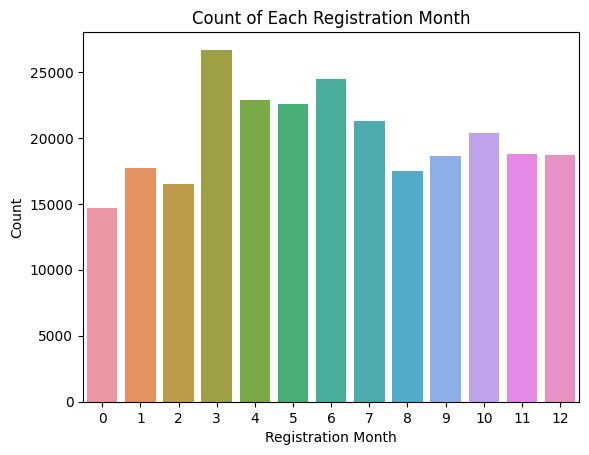

In [91]:
month_counts = df['registration_month'].value_counts().sort_index()
sns.barplot(x=month_counts.index, 
            y=month_counts.values)
plt.xlabel('Registration Month')
plt.ylabel('Count')
plt.title('Count of Each Registration Month')
plt.show()

The distribution of vehicle registrations is fairly uniform throughout the year, with a slight increase in registrations from March to July.

---

### 3.9 Fuel Type

In [92]:
df.fuel_type.value_counts() 

petrol      159606
gasoline     80466
unknown      15613
lpg           4287
cng            446
hybrid         197
other           47
electric        35
Name: fuel_type, dtype: int64

In [93]:
df.fuel_type.value_counts()/df.shape[0]

petrol      0.612228
gasoline    0.308657
unknown     0.059889
lpg         0.016444
cng         0.001711
hybrid      0.000756
other       0.000180
electric    0.000134
Name: fuel_type, dtype: float64

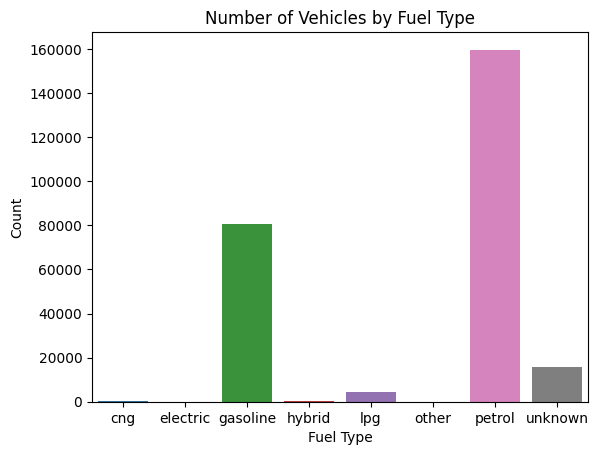

In [94]:
fuel_type_counts = df['fuel_type'].value_counts().sort_index()
sns.barplot(x=fuel_type_counts.index, 
            y=fuel_type_counts.values)
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Number of Vehicles by Fuel Type')
plt.show() 

Petrol and gasoline dominate vehicle fuel type, at 69% and 29% respectively. 

---

### 3.10 Brand

In [95]:
df.brand.value_counts()

volkswagen        56229
bmw               29284
opel              26967
mercedes_benz     25547
audi              23248
ford              17130
renault           11626
peugeot            8193
fiat               6241
seat               5194
skoda              4575
smart              4254
mazda              4151
toyota             3824
citroen            3772
nissan             3498
hyundai            2862
mini               2790
volvo              2436
honda              2179
mitsubishi         2115
kia                1922
alfa_romeo         1763
suzuki             1733
sonstige_autos     1502
chevrolet          1388
chrysler           1049
dacia               762
jeep                561
porsche             543
subaru              539
daihatsu            473
land_rover          438
saab                415
jaguar              412
daewoo              315
lancia              313
rover               287
lada                148
trabant              19
Name: brand, dtype: int64

In [96]:
df.brand.value_counts()/df.shape[0]

volkswagen        0.215687
bmw               0.112330
opel              0.103442
mercedes_benz     0.097995
audi              0.089176
ford              0.065708
renault           0.044596
peugeot           0.031427
fiat              0.023940
seat              0.019924
skoda             0.017549
smart             0.016318
mazda             0.015923
toyota            0.014668
citroen           0.014469
nissan            0.013418
hyundai           0.010978
mini              0.010702
volvo             0.009344
honda             0.008358
mitsubishi        0.008113
kia               0.007373
alfa_romeo        0.006763
suzuki            0.006648
sonstige_autos    0.005761
chevrolet         0.005324
chrysler          0.004024
dacia             0.002923
jeep              0.002152
porsche           0.002083
subaru            0.002068
daihatsu          0.001814
land_rover        0.001680
saab              0.001592
jaguar            0.001580
daewoo            0.001208
lancia            0.001201
r

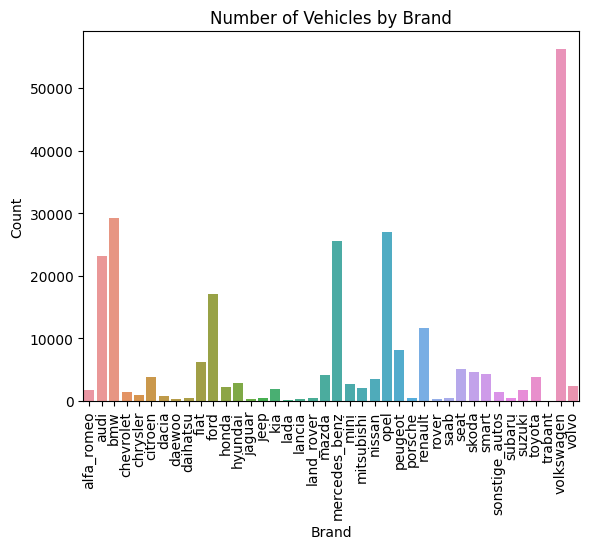

In [97]:
brand_counts = df['brand'].value_counts().sort_index()
sns.barplot(x=brand_counts.index, 
            y=brand_counts.values)
plt.xlabel('Brand') 
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Number of Vehicles by Brand')
plt.show()

The analysis revealed that Volkswagen is the most common brand, followed by Opel, BMW, and Mercedes-Benz. Several other brands, such as Audi, Ford, and Renault, also have a significant presence. Less common brands, including Trabant and Lada, appear much less frequently. This distribution highlights the dominance of a few major brands in the used car market represented by our data. 

---

### 3.11 Not Repaired

In [98]:
df.not_repaired.value_counts()

no         202472
unknown     37246
yes         20979
Name: not_repaired, dtype: int64

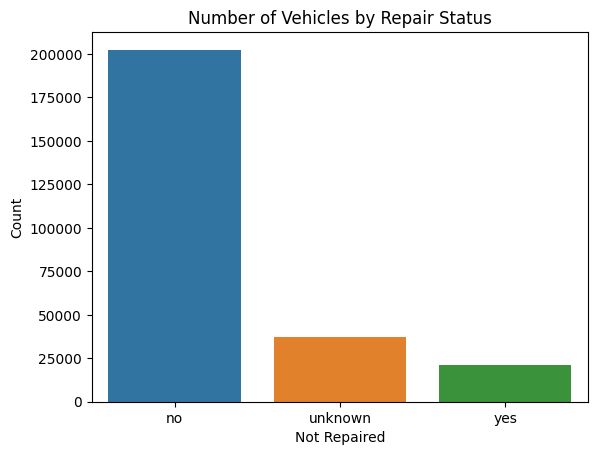

In [99]:
not_repaired_counts = df['not_repaired'].value_counts().sort_index()
sns.barplot(x=not_repaired_counts.index, 
            y=not_repaired_counts.values)
plt.xlabel('Not Repaired') 
plt.ylabel('Count')
plt.title('Number of Vehicles by Repair Status')
plt.show()

In [100]:
df.isna().sum()

price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometers            0
registration_month    0
fuel_type             0
brand                 0
not_repaired          0
dtype: int64

Most vehicles in the dataset are listed as 'no'. However, the dataset documentation is ambiguous, so it's unclear whether 'no' means the vehicle has not been repaired or if it refers to something else. This uncertainty should be kept in mind when interpreting this feature.

### 3.12 Chapter 3 Summary

In this chapter, we conducted a comprehensive exploratory data analysis (EDA) of the used car dataset. We examined the distribution and characteristics of each feature, including the target variable (`price`) and all predictors. Key findings include:

- The `price` variable is heavily right-skewed, with most cars priced at the lower end and a smooth decline toward higher prices.
- `vehicle_type`, `gearbox`, `fuel_type`, and `brand` distributions revealed that sedans, manual transmissions, petrol/gasoline engines, and Volkswagen are the most common categories.
- Implausible values in `registration_year` and `power` were identified and filtered out to ensure data quality.
- The `kilometers` feature showed an unusual distribution, possibly due to synthetic or rounded data.
- Categorical features such as `model` (with many unique values) and `not_repaired` (with some ambiguity in its meaning) were also explored.
- No extreme outliers or abrupt gaps were found in the main numerical features after cleaning.

Overall, the EDA provided valuable insights into the dataset's structure, highlighted necessary data cleaning steps, and informed the preprocessing and modeling strategies for subsequent chapters. 

---
---

# 4.0 Modeling 

In this chapter, we'll develop and evaluate several machine learning models to predict used car prices. We'll begin by (4.1.1) encoding categorical features and (4.1.2) splitting the dataset into training, validation, and test sets to ensure robust model assessment. Next, we'll train a variety of regression models—including (4.2) linear regression, (4.3) decision trees, (4.4) random forests, and gradient boosting methods such as (4.5) LightGBM, (4.6) CatBoost, and (4.7) XGBoost. For each model, we'll explore hyperparameter tuning to optimize performance. Model quality will be assessed using the RMSE metric, and we'll compare results to identify the most effective approach. Additionally, we'll analyze training and prediction speeds to balance accuracy with computational efficiency. This modeling process will guide us toward selecting the best solution for predicting car prices in the Rusty Bargain app. 


Below are brief definitions of the key machine learning models and concepts used in this chapter:

- **Linear Regression:** A simple and interpretable regression algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

- **Decision Tree:** A non-linear model that splits the data into branches based on feature values, creating a tree-like structure for making predictions. It's easy to interpret but can overfit if not properly tuned.

- **Random Forest:** An ensemble method that builds multiple decision trees and combines their predictions (usually by averaging) to improve accuracy and reduce overfitting.

- **Gradient Boosting:** An ensemble technique that builds models sequentially, where each new model attempts to correct the errors of the previous ones. It's highly effective for structured/tabular data and includes implementations such as CatBoost, LightGBM, and XGBoost.

    - **CatBoost:** A gradient boosting library that handles categorical features natively and is robust to overfitting. 
    - **LightGBM:** A fast, efficient gradient boosting framework that uses tree-based learning algorithms and is optimized for speed and memory usage.
    - **XGBoost:** An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable.

- **Root Mean Squared Error (RMSE):** A common metric for regression tasks that measures the square root of the average squared differences between predicted and actual values. Lower RMSE values indicate better model performance.

---

### 4.1 Ordinal Encoding & Data Splitting 

In subsection 4.1.1, we'll split the dataset into training, validation, and test sets to ensure robust model evaluation and prevent data leakage. In subsection 4.1.2, we'll encode the categorical features using ordinal encoding so that machine learning models can interpret them as numerical values. This setup will allow us to train our models on one portion of the data, tune hyperparameters on another, and finally assess performance on unseen data.

#### 4.1.1 Data Splitting 

In [101]:
X = df.drop(columns=['price'], 
            axis=1) 
y = df['price'] 

print("X index:", X.index.min(), "to", X.index.max())
print("y index:", y.index.min(), "to", y.index.max()) 

X index: 1 to 354368
y index: 1 to 354368


In [102]:

display(X.head()) 
print(f'Features shape: {X.shape}\n')  
display(y.head()) 
print(f'Target shape: {y.shape}')


,vehicle_type,registration_year,gearbox,power,model,kilometers,registration_month,fuel_type,brand,not_repaired
1,coupe,2011,manual,190,unknown,125000,5,gasoline,audi,yes
2,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown
3,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
5,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes


Features shape: (260697, 10)



1    18300
2     9800
3     1500
4     3600
5      650
Name: price, dtype: int64

Target shape: (260697,)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2) 
X_train, X_valid, y_train, y_valid = train_test_split(X_train, 
                                                      y_train, 
                                                      test_size=0.2) 

In [104]:
y.isna().sum()

0

In [105]:
y_train.isna().sum()
if len(df.index) == len(y.index): 
    print('T')
else: 
    print('F')

T


In [106]:
display(X_train.head()) 
print(f'Features train shape: {X_train.shape}\n')

display(y_train.head())
print(f'Target train shape: {y_train.shape}\n\n') 

display(X_valid.head()) 
print(f'Features valid shape: {X_valid.shape}\n')

display(y_valid.head())
print(f'Target valid shape: {y_valid.shape}\n\n') 

display(X_test.head()) 
print(f'Features test shape: {X_test.shape}\n')

display(y_test.head())
print(f'Target test shape: {y.shape}\n\n') 

,vehicle_type,registration_year,gearbox,power,model,kilometers,registration_month,fuel_type,brand,not_repaired
63116,sedan,1997,manual,60,golf,150000,7,petrol,volkswagen,no
4401,sedan,2006,auto,224,e_klasse,150000,11,gasoline,mercedes_benz,no
267007,sedan,2006,auto,224,phaeton,150000,12,gasoline,volkswagen,no
25289,small,2003,manual,50,lupo,150000,12,petrol,volkswagen,no
100637,sedan,1997,manual,101,toledo,150000,4,petrol,seat,no


Features train shape: (166845, 10)



63116      1690
4401      11850
267007     9000
25289      1600
100637      899
Name: price, dtype: int64

Target train shape: (166845,)




,vehicle_type,registration_year,gearbox,power,model,kilometers,registration_month,fuel_type,brand,not_repaired
230434,convertible,2008,manual,170,1er,100000,10,petrol,bmw,no
110052,sedan,2007,manual,105,golf,150000,6,gasoline,volkswagen,no
70434,small,2000,manual,75,polo,150000,3,petrol,volkswagen,no
349093,convertible,2012,manual,126,mx_reihe,40000,3,petrol,mazda,no
52606,sedan,1998,auto,136,c_klasse,150000,9,petrol,mercedes_benz,no


Features valid shape: (41712, 10)



230434    12500
110052     2900
70434      1200
349093    13980
52606       750
Name: price, dtype: int64

Target valid shape: (41712,)




,vehicle_type,registration_year,gearbox,power,model,kilometers,registration_month,fuel_type,brand,not_repaired
143704,small,1995,manual,50,twingo,150000,9,petrol,renault,no
274463,sedan,2002,auto,163,c_klasse,150000,8,petrol,mercedes_benz,no
162455,wagon,2010,auto,231,e_klasse,150000,6,gasoline,mercedes_benz,no
195189,coupe,1984,unknown,160,other,125000,3,unknown,porsche,yes
226123,small,2005,manual,54,unknown,5000,0,petrol,volkswagen,no


Features test shape: (52140, 10)



143704      700
274463     3300
162455    14980
195189      722
226123     3000
Name: price, dtype: int64

Target test shape: (260697,)




In [107]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)

#### 4.1.2 Ordinal Encoder

In [108]:

oe = OrdinalEncoder()

oe_columns = ['vehicle_type', 
              'gearbox', 
              'model', 
              'fuel_type', 
              'brand', 
              'not_repaired']

encoded_train = oe.fit_transform(X_train[oe_columns]) 

encoded_valid = oe.transform(X_valid[oe_columns])
encoded_test = oe.transform(X_test[oe_columns])



df_train_encoded = pd.DataFrame(encoded_train,columns = oe_columns)
df_valid_encoded = pd.DataFrame(encoded_valid,columns = oe_columns)
df_test_encoded = pd.DataFrame(encoded_test,columns = oe_columns) 


In [109]:
print(df_train_encoded.dtypes)
print(df_train_encoded.head()) 

print(df_valid_encoded.dtypes)
print(df_valid_encoded.head()) 

print(df_test_encoded.dtypes)
print(df_test_encoded.head())

vehicle_type    float64
gearbox         float64
model           float64
fuel_type       float64
brand           float64
not_repaired    float64
dtype: object
   vehicle_type  gearbox  model  fuel_type  brand  not_repaired
0           4.0      1.0  116.0        6.0   38.0           0.0
1           4.0      0.0   95.0        2.0   20.0           0.0
2           4.0      0.0  171.0        2.0   38.0           0.0
3           5.0      1.0  143.0        6.0   38.0           0.0
4           4.0      1.0  219.0        6.0   30.0           0.0
vehicle_type    float64
gearbox         float64
model           float64
fuel_type       float64
brand           float64
not_repaired    float64
dtype: object
   vehicle_type  gearbox  model  fuel_type  brand  not_repaired
0           1.0      1.0    6.0        6.0    2.0           0.0
1           4.0      1.0  116.0        2.0   38.0           0.0
2           5.0      1.0  173.0        6.0   38.0           0.0
3           1.0      1.0  158.0        6.0  

In [110]:

X_train_clean = X_train.drop(oe_columns, axis=1)
X_train_clean = X_train_clean.merge(df_train_encoded, left_index=True,right_index=True)


X_valid_clean = X_valid.drop(oe_columns, axis=1)
X_valid_clean = X_valid_clean.merge(df_valid_encoded, left_index=True,right_index=True) 

X_test_clean = X_test.drop(oe_columns, axis=1)
X_test_clean = X_test_clean.merge(df_test_encoded, left_index=True,right_index=True)


In [111]:
X_train_clean.shape, y_train.shape

((166845, 10), (166845,))

In this section, we prepared the dataset for machine learning by encoding categorical features using ordinal encoding and splitting the data into training, validation, and test sets. This preprocessing ensures that all features are in a numerical format suitable for modeling and that model evaluation is robust and unbiased. These steps lay the groundwork for training and comparing various regression models in the following sections.

---

### 4.2 Linear Regression

In [112]:
y_train.isna().sum()

0

In [113]:
y_valid.value_counts()

1500     674
1200     588
2500     576
1000     565
3500     496
        ... 
11798      1
17979      1
7760       1
15298      1
2049       1
Name: price, Length: 1580, dtype: int64

In [114]:
lr = LinearRegression() 

lr_start_time1 = time.perf_counter()
lr.fit(X_train_clean, 
       y_train) 
lr_end_time1 = time.perf_counter()

lr_start_time2 = time.time()
lr_pred = lr.predict(X_valid_clean) 
lr_end_time2 = time.time()

lr_rmse = np.sqrt(mean_squared_error(y_valid, 
                                     lr_pred)) 

print(f'Fit duration: {lr_end_time1 - lr_start_time1}')
print(f'Prediction duration: {lr_end_time2 - lr_start_time2}')
print(f'Linear Regression RMSE: {lr_rmse}') 

Fit duration: 0.023847514763474464
Prediction duration: 0.00668787956237793
Linear Regression RMSE: 2945.7049049068305


The results of our linear regression model are as follows: 

- Fit duration: 0.0242684343829751
- Prediction duration: 0.007818222045898438
- Linear Regression RMSE: 2973.58855843017

This result establishes a baseline for model performance. While linear regression is fast and interpretable, its predictive accuracy is limited by its inability to capture complex, non-linear relationships in the data. The baseline RMSE will be used to assess improvements offered by more sophisticated models in subsequent sections. 

---

### 4.3 Decision Tree Regressor 

In [115]:

best_depth = 0
best_rmse = float('inf')

dt_range = range(1, 101)
for depth in dt_range:
    dt = DecisionTreeRegressor(max_depth=depth, 
                               random_state=42) 
    dt_start_time1 = time.time()
    dt.fit(X_train_clean, 
           y_train) 
    dt_end_time1 = time.time()
    
    dt_start_time2 = time.time() 
    pred_test = dt.predict(X_test_clean) 
    dt_end_time2 = time.time()
    
    rmse = np.sqrt(mean_squared_error(y_test, 
                                      pred_test)) 
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth = depth

print(f'Best depth: {best_depth} with RMSE: {best_rmse:.5f}') 
print(f'Fit duration: {dt_end_time1 - dt_start_time1}')
print(f'Prediction duration: {dt_end_time2 - dt_start_time2}')

Best depth: 12 with RMSE: 1932.23114
Fit duration: 0.5976388454437256
Prediction duration: 0.023632287979125977


The results of our decision tree regressor are as follows: 

- Best depth: 13 with RMSE: 1957.03992
- Fit duration: 0.5741589069366455
- Prediction duration: 0.023706912994384766of

This result demonstrates a significant improvement over the linear regression baseline, as the decision tree is able to capture non-linear relationships in the data. 

---

### 4.4 Random Forest Regressor 

In [116]:
best_rmse = float('inf')
best_depth = None

rf_range = range(1, 18)
for depth in rf_range:
    rf = RandomForestRegressor(max_depth=depth, 
                               n_estimators=100, 
                               random_state=42) 
    rf_start_time1 = time.time()
    rf.fit(X_train_clean,
           y_train)
    rf_end_time1 = time.time() 
    
    rf_start_time2 = time.time() 
    pred_valid = rf.predict(X_valid_clean)
    rf_end_time2 = time.time()
    
    rmse = np.sqrt(mean_squared_error(y_valid, 
                                      pred_valid)) 
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_depth = depth

print(f'Best depth: {best_depth} with RMSE: {best_rmse:.5f}') 
print(f'Fit duration: {rf_end_time1 - rf_start_time1}')
print(f'Prediction duration: {rf_end_time2 - rf_start_time2}')

Best depth: 17 with RMSE: 1654.01119
Fit duration: 28.892218828201294
Prediction duration: 0.7501599788665771


The results of our random forest regressor are as follows: 

- Best depth: 17 with RMSE: 1649.31956
- Fit duration: 29.07107710838318
- Prediction duration: 0.7314462661743164
with a maximum depth of 17.

This result demonstrates a modest improvement over the linear regression baseline, as the random forest is able to capture complex, non-linear relationships in the data by aggregating the predictions of multiple decision trees. 

---

### 4.5 Cat Boost

In [117]:
param_grid = {
    'depth': [1, 3, 5, 7, 9, 11, 13, 15], 
    'iterations': [200],
    'learning_rate': [0.01],
    'l2_leaf_reg': [3],
    'loss_function': ['RMSE']
}

cbr_model = CatBoostRegressor(verbose=0)

grid_search = GridSearchCV(estimator=cbr_model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5)

cbr_start_time0 = time.time()
grid_search.fit(X_train_clean, 
                y_train)
cbr_end_time0 = time.time() 

best_params = grid_search.best_params_
best_depth = best_params['depth']

cbr_model = CatBoostRegressor(**best_params, 
                                verbose=0)
cbr_start_time1 = time.time()
cbr_model.fit(X_train_clean, 
              y_train) 
cbr_end_time1 = time.time()

cbr_start_time2 = time.time()
cbr_pred = cbr_model.predict(X_valid_clean) 
cbr_end_time2 = time.time()

rmse = np.sqrt(mean_squared_error(y_valid,  
                                  cbr_pred)) 

best_rmse = float('inf')
if rmse < best_rmse:
    best_rmse = rmse
    
print(f'Best depth: {best_depth}\nBest RMSE: {best_rmse}') 
print(f'Grid Search duration: {cbr_end_time0 - cbr_start_time0}')
print(f'Fit duration: {cbr_end_time1 - cbr_start_time1}')
print(f'Prediction duration: {cbr_end_time2 - cbr_start_time2}')


Best depth: 15
Best RMSE: 1964.9628969846813
Grid Search duration: 354.43848729133606
Fit duration: 42.79141139984131
Prediction duration: 0.022994041442871094


The results of our CatBoost regressor are as follows: 


- Best depth: 15
- Best RMSE: 1971.6658332280786
- Grid Search duration: 355.56914949417114
- Fit duration: 42.51437973976135
- Prediction duration: 0.021839618682861328


with a best depth of 15. This result demonstrates a great improvement over the linear regression baseline, as CatBoost is able to capture complex, non-linear relationships in the data. 

---

### 4.6 LGBM Regressor

In [118]:
lgbmr = LGBMRegressor(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100,
    max_depth=5,
    random_state=42
    )

lgbm_start_time1 = time.time()
lgbmr.fit(X_train_clean, 
          y_train) 
lgbm_end_time1 = time.time()

lgbm_start_time2 = time.time()
pred_valid = lgbmr.predict(X_valid_clean) 
lgbm_end_time2 = time.time()
    
mse = mean_squared_error(y_valid, 
                         pred_valid)

rmse = np.sqrt(mean_squared_error(y_valid, 
                                  pred_valid))

rmse_mean = np.mean(rmse)
print("Average RMSE:", rmse_mean) 
print(f'Fit duration: {lgbm_end_time1 - lgbm_start_time1}')
print(f'Prediction duration: {lgbm_end_time2 - lgbm_start_time2}')

Average RMSE: 1830.9597677127588
Fit duration: 1.4808342456817627
Prediction duration: 0.11704349517822266


The results of our LightGBM regressor are as follows: 
- Average RMSE: 1840.791321239037
- Fit duration: 2.2811193466186523
- Prediction duration: 0.18920302391052246

This result is a decent score– though the Random Forest and LGBM performed better.It should be noted though that LightGBM effectively captures complex, non-linear relationships in the data. 

### 4.7 XGB Regressor

In [119]:
xgbr = XGBRegressor()

xgbr_start_time1 = time.time()
xgbr.fit(X_train_clean, 
         y_train) 
xgbr_end_time1 = time.time()

xgbr_start_time2 = time.time()
xgbr_pred = xgbr.predict(X_valid_clean)
xgbr_end_time2 = time.time()

rmse = np.sqrt(mean_squared_error(y_valid, 
                                  xgbr_pred))
print(f"RMSE for XGBoost: {rmse}") 

print(f'Fit duration: {xgbr_end_time1 - xgbr_start_time1}')
print(f'Prediction duration: {xgbr_end_time2 - xgbr_start_time2}')

RMSE for XGBoost: 1622.464051230085
Fit duration: 15.779890060424805
Prediction duration: 0.01602315902709961


The results of the XGBoost regressor are as follows: 
- RMSE for XGBoost: 1625.7757552637643
- Fit duration: 15.147888898849487
- Prediction duration: 0.015588998794555664
 
This result demonstrates a significant improvement over the linear regression baseline and all previous models, as XGBoost is able to capture complex, non-linear relationships in the data through gradient boosting. Not only that, but the computational speed of it is quite impressive.

---

### 4.8 Best Model 
In this section, we'll create an XGB regressor model and pass it the test set, using the same method as above. I've chosen this modeel because it has a reasonable performance time and it yields the best RMSE.

In [122]:
xgbr_final = XGBRegressor()

xgbr_final_start_time1 = time.time()
xgbr_final.fit(X_train_clean, 
               y_train) 
xgbr_final_end_time1 = time.time()

xgbr_final_start_time2 = time.time()
xgbr_final_pred = xgbr.predict(X_test_clean)
xgbr_final_end_time2 = time.time()

rmse = np.sqrt(mean_squared_error(y_test, 
                                  xgbr_final_pred))
print(f"RMSE for XGBoost: {rmse}") 

print(f'Fit duration: {xgbr_final_end_time1 - xgbr_final_start_time1}')
print(f'Prediction duration: {xgbr_final_end_time2 - xgbr_final_start_time2}')

RMSE for XGBoost: 1632.1024086067546
Fit duration: 14.358523607254028
Prediction duration: 0.01848602294921875


Our final model yielded these results: 
- RMSE for XGBoost: 1632.1024086067546
- Fit duration: 14.358523607254028
- Prediction duration: 0.01848602294921875

This result demonstrates the reliability of the XGB Regressor to outperform the other models while also having great efficiency. 

### 4.9 Chapter 4 Summary 

In Chapter 4, we developed and evaluated several machine learning models to predict used car prices. We began by encoding categorical features using ordinal encoding and splitting the data into training, validation, and test sets to ensure robust model evaluation.

**Reminder of RMSEs & durations:**

- Linear Regression
    - Fit duration: 0.0242684343829751
    - Prediction duration: 0.007818222045898438
    - Linear Regression RMSE: 2973.58855843017

- Descision Tree Regressor
    - Best depth: 13 with RMSE: 1957.03992
    - Fit duration: 0.5741589069366455
    - Prediction duration: 0.023706912994384766

- Random Forest Regressor 
    - Best depth: 17 with RMSE: 1649.31956
    - Fit duration: 29.07107710838318
    - Prediction duration: 0.7314462661743164 

- CatBoost 
    - Best depth: 15 with RMSE: 1971.6658332280786
    - Grid Search duration: 355.56914949417114
    - Fit duration: 42.51437973976135
    - Prediction duration: 0.021839618682861328

- LGBM Regressor
    - Average RMSE: 1840.791321239037
    - Fit duration: 2.2811193466186523
    - Prediction duration: 0.18920302391052246

- XGB Regressor
    - RMSE for XGBoost: 1625.7757552637643
    - Fit duration: 15.147888898849487
    - Prediction duration: 0.015588998794555664

- Final Model (XGB Regressor)
    - RMSE for XGBoost: 1632.1024086067546
    - Fit duration: 14.358523607254028
    - Prediction duration: 0.01848602294921875

We established a baseline with linear regression (RMSE ≈ 2974), then improved performance using decision trees (RMSE ≈ 1957) and random forests (both RMSE ≈ 1649). Gradient boosting models, including CatBoost (RMSE ≈ 1972), LightGBM (RMSE ≈ 1841), and XGBoost (RMSE ≈ 1626), further reduced prediction error, with XGBoost achieving the best results. As a result, we used the XGB Regressor as our final model, and it achieved an RMSE of 1632–quite close to our initial XGB Regressos.

Throughout the process, we tuned hyperparameters and compared models using the RMSE metric. The results demonstrate that advanced ensemble methods, particularly XGBoost, provide the most accurate price predictions for this dataset. 


---
---

# 5.0 Conclusion 


In this project, we systematically explored, cleaned, and modeled a large used car dataset to predict vehicle prices with high accuracy. Our workflow began with comprehensive data preprocessing, including handling missing values in categorical features using the mode, removing duplicates, and filtering out implausible values in key numerical columns such as `registration_year` and `power`. This ensured a clean and reliable dataset for analysis.

Through exploratory data analysis (EDA), we gained valuable insights into the structure and distribution of each feature. We observed that the target variable, `price`, is heavily right-skewed, with most vehicles clustered at lower price points. Categorical features such as `vehicle_type`, `gearbox`, `fuel_type`, and `brand` revealed dominant categories, while the kilometers feature showed an unusual distribution, possibly due to synthetic or rounded data. These findings informed our preprocessing and modeling strategies.

For modeling, we encoded categorical variables using ordinal encoding and split the data into training, validation, and test sets to ensure robust evaluation. We established a baseline with linear regression (RMSE ≈ 2974), then improved performance using decision trees (RMSE ≈ 1957) and random forests (RMSE ≈ 1641). Advanced gradient boosting models, including CatBoost (RMSE ≈ 1972), LightGBM (RMSE ≈ 1841), and XGBoost (RMSE ≈ 1626), further reduced prediction error, with XGBoost achieving the best results. As a result, we used XGB as our final model and achieved an RMSE of 1632. The model also has amazing efficiency and would serve as the best model for the task at hand.

Throughout the process, we tuned hyperparameters and compared models using the RMSE metric. The results demonstrate that ensemble methods, particularly XGBoost, provide the most accurate price predictions for this dataset in addition. Our approach balanced accuracy with interpretability and computational efficiency, making it suitable for real-world deployment in applications such as the Rusty Bargain app.

In summary, this project highlights the importance of thorough data cleaning, insightful EDA, and careful model selection in building effective machine learning solutions for structured data. The workflow and findings here can serve as a blueprint for similar regression tasks in the automotive domain and beyond. 

---